Trinôme G1 :
- 191931066239, AMAZOUZ Sara Selma
- 191931045284, GHENAIET Walid
- 191931089336, MOULAI Mohamed Youcef

-----------

# TP 4 Regression logistique avec régularisation
Dans ce TP, nous aimerions faire une classification binaire en utilisant la régression.

Pour ce faire, nous étudierons un ensemble de données avec la variable  (y) representant la commercialisation d'un profuit et les caractéristiques (X) representant les résultat des tests de qualité test 1 et test 2 du produit.

La prédiction se fera avec l'agorithme de descente du gradient avec régularisation.

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(118, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente la commercialisation (1 oui 0 non).

Chaque ligne represente un exemple de notre ensemble de données.

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
def scaling(X):

  newX = X - np.mean(X, axis=0)
  X_transformed = newX / np.std(newX, axis=0)

  return X_transformed

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X = data[:, 0:2]
X = scaling(X)
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [ ]:
print('X', X.shape ,' y ', y.shape)

X (118, 3)  y  (118, 1)


# Transformation de données
Dans cette partie, nous aimerions transformer nos données afin d'avoir une fonction polynomiale de degrée 6.

La fonction sera:

$x_0=1$

$x_1=x_1$

$x_2=x_2$

$x_3={x_1}^2$

$x_4={x_1}x_2$

$x_5={x_2}^2$

$x_6={x_1}^3$

$x_7={x_1}^2 x_2$

$x_8= x_1 {x_2}^2$

$x_9= {x_2}^3$

...


Pour un polynme de degrée 6 à 2 variables nous aurons 28 caracteristiques

**Question**: comment avons nous trouvé ce chiffre?

**Astuce**: référez vous aux probabilités

In [ ]:
def mapping(X):

    cols = 28
    degree=7
    outX= np.ones((X.shape[0],cols))
    X1=X[:,1]
    X2=X[:,2]
    k=0
    for i in range(degree):
        for j in range(i+1):
            outX[:, k] = np.power(X1,i-j)*(np.power(X2,j))
            k=k+1
    return outX


In [ ]:
X2=mapping(X)
X2.shape

(118, 28)

# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [ ]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z))


In [ ]:
k=Sigmoid(-10)
k

4.5397868702434395e-05

In [ ]:
def prediction(X, theta):
  return np.dot(X, theta)

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [ ]:
def computeCost(X, y, theta, Lambda):

    wahed = np.ones((y.shape[0], 1)).astype(float)
    y_preds = Sigmoid(np.dot(X, theta))
    # Fonction cout de la regression logistique + la regularisation
    reg = Lambda * np.sum((theta[1:] ** 2)) / (2 * y.shape[0])
    costLog =  - ( np.sum(y * np.log(y_preds) + (wahed - y) * np.log(wahed - y_preds)) / y.shape[0] )
    return  costLog + reg

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations, Lambda):
    # garder aussi le cout à chaque itération
    # pour afficher le coût en fonction de theta0 et theta1

    thetas = []
    costs = []

    for i in range(iterations):

      # feed forward
      cost = computeCost(X, y, theta, Lambda)

      # sauvegarde des couts & thetas
      costs.append(cost)
      thetas.append(np.array(theta))

      # calcul des derivees & modification des poids thetas (back propagation)
      for j in range(1, X.shape[1]):
        d = ( (np.dot(np.array(X[:,j]).transpose(), (Sigmoid(prediction(X, theta)) - y))) + (Lambda * theta[j]) ) / y.shape[0];
        theta[j] -= alpha * d
      theta[0] -= alpha * np.dot(np.array(X[:,0]).transpose(), (Sigmoid(prediction(X, theta)) - y)) / y.shape[0]

    return np.array(thetas), np.array(costs)

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [ ]:
n=X2.shape[1]
theta = np.zeros((n, 1))
theta = theta.astype(float)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
conc = []
for i in range(28):
  conc.append(theta[i])
conc = np.asarray(conc)
conc.shape

(28, 1)

Calculer le cout initial

In [ ]:
Lambda = 1
initialCost=computeCost(X2, y, theta, Lambda)
print(initialCost)

0.6931471805599454


Appel des la fonction de calcul du gradient

In [ ]:
# paramètres
iterations = 1500
alpha = 1

# paramètre de regression
Lambda = 1

# Appel
thetas, costs = gradientDescent(X2, y, theta, alpha, iterations, Lambda)

In [ ]:
finalCost = costs[-1]
finalCost

0.5290027297126492

In [ ]:
finalThetas = thetas[-1]
finalThetas

array([[ 1.27273944],
       [ 0.62527178],
       [ 1.18108861],
       [-2.01996069],
       [-0.91742349],
       [-1.43166421],
       [ 0.1240064 ],
       [-0.3655344 ],
       [-0.35723978],
       [-0.17513031],
       [-1.45815653],
       [-0.05098935],
       [-0.61555511],
       [-0.27470627],
       [-1.19281648],
       [-0.24218817],
       [-0.20600614],
       [-0.04473103],
       [-0.27778444],
       [-0.2953781 ],
       [-0.4563576 ],
       [-1.0432026 ],
       [ 0.02777151],
       [-0.29243139],
       [ 0.01556661],
       [-0.32737959],
       [-0.14388692],
       [-0.92465282]])

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [ ]:
def drawCircle(X, y, theta):

  a, b = np.meshgrid(np.linspace(X[:, 1].min(), X[:, 1].max(), 100),
                         np.linspace(X[:, 2].min(), X[:, 2].max(), 100))
  c = (np.c_[np.ones(a.size), a.flatten(), b.flatten()])
  Z = (np.dot(mapping(c), theta)).reshape(a.shape)

  plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
  plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')

  plt.contour(a, b, Z, levels=[0], colors= "black")
  plt.xlabel('Note module 1')
  plt.ylabel('Note module 2')
  plt.show()

 *** Decision Boundary *** 


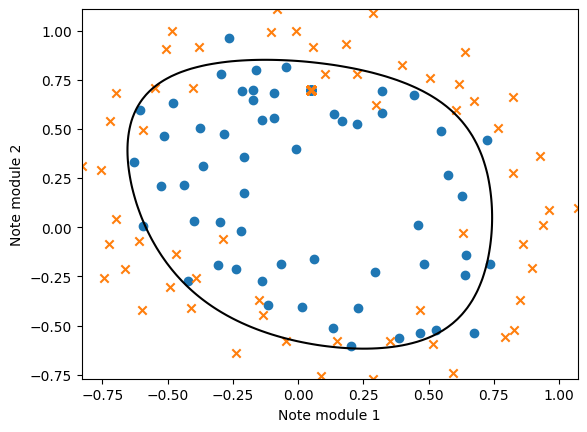

In [ ]:
print(" *** Decision Boundary *** ")
drawCircle(X, y, finalThetas)

# Classification (Prédiction)
Ici il serait interessant de calculer la prédiction en utilisant un seuil
i.e. si h>seuil alors classe =1 sinon classe = 0

In [ ]:
def predict_class(X, theta):
  y_pred = Sigmoid(prediction(X, theta))
  for i in range(y_pred.shape[0]):
    y_pred[i] = 0 if y_pred[i] <= 0.5 else 1
  return y_pred

# Affichage
Graphe representant les acceptations selon les caracteristiques

Text(0, 0.5, 'x 2')

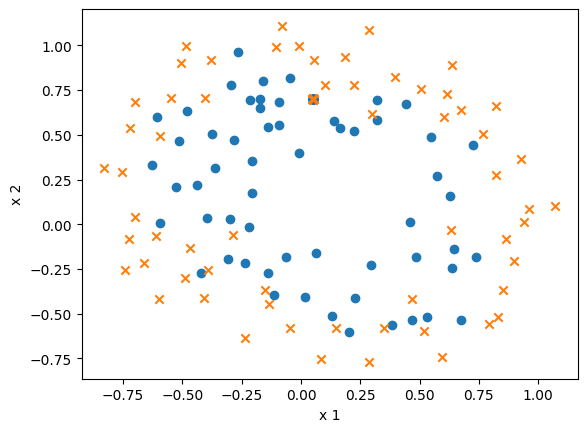

In [ ]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="y=1",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="y=0",marker ='x')

plt.xlabel('x 1')
plt.ylabel('x 2')

Traçage de la fonction du coût

In [ ]:
def plot_cost(costs):
  plt.plot(costs.reshape(costs.shape[0],1))
  plt.xlabel('Itérations')
  plt.ylabel('Coût')
  plt.title("Coût en fonction des itérations")
  plt.show()

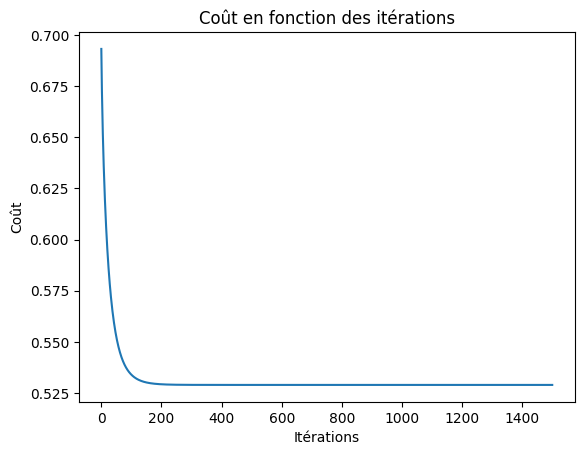

In [ ]:
plot_cost(costs)

Traçage du coût en fonction de theta0 et theta1

<ipython-input-54-6d67e21ed367>:16: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  TH = np.array(TH, dtype=np.float32)


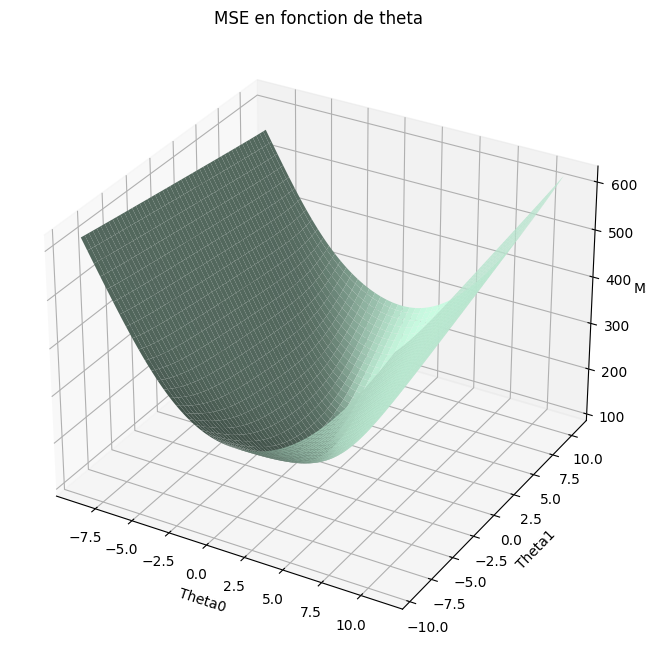

In [ ]:
xt = np.arange(theta[0] - 10, theta[0] + 10, 0.1)
yt = np.arange(theta[1] - 10, theta[1] + 10, 0.1)
thetas0, thetas1 = np.meshgrid(xt, yt)
theta_mesh = np.expand_dims(np.stack((thetas0, thetas1), axis=-1), axis=3)
mses = []

for t0, t1 in zip(np.ravel(thetas0), np.ravel(thetas1)):

    # using TH to concatenate theta0 and theta1 with the rest of thetas
    TH = []
    TH.append(t0)
    TH.append(t1)
    # rest of thetas
    for i in range(2,28):
      TH.append(theta[i])
    TH = np.array(TH, dtype=np.float32)
    cost = computeCost(X2, y, TH, Lambda)
    mses.append(cost)

mses = np.array(mses)
mses = mses.reshape(thetas0.shape)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(thetas0, thetas1, mses,  color='#CCFFE5')
ax.set_xlabel("Theta0")
ax.set_ylabel("Theta1")
ax.set_zlabel("MSE")
ax.set_title("MSE en fonction de theta")
plt.show()

# Qualité du classifieur

Prédire des valeurs de y

Ici il serait interessant de calculer la précision de notre classifieur

Essayons de calculer ça avec

moyenne(y==y-pred) * 100

Ceci donnera un pourcentage de precision

In [ ]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)

# Elle est calculee en bas !

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(penalty='l1', solver='saga', max_iter=1500)
#y = y.reshape(y.shape[0])
LR.fit(X,y.reshape(y.shape[0]))

LogisticRegression(max_iter=1500, penalty='l1', solver='saga')

Comparaison des thetas & du coût

In [ ]:
print("*** THETAS ***")
skThetas = np.array([[LR.intercept_], [LR.coef_[0][1]], [LR.coef_[0][2]]]).astype(float)
print('sklearn = ')
print(skThetas)
print('ours    = ')
print(finalThetas)
print("*** COST ***")
print('sklearn = ', computeCost(X, y, skThetas, Lambda))
print('ours    = ', finalCost)

*** THETAS ***
sklearn = 
[[-0.02512564]
 [-0.16129536]
 [ 0.        ]]
ours    = 
[[ 1.27273944]
 [ 0.62527178]
 [ 1.18108861]
 [-2.01996069]
 [-0.91742349]
 [-1.43166421]
 [ 0.1240064 ]
 [-0.3655344 ]
 [-0.35723978]
 [-0.17513031]
 [-1.45815653]
 [-0.05098935]
 [-0.61555511]
 [-0.27470627]
 [-1.19281648]
 [-0.24218817]
 [-0.20600614]
 [-0.04473103]
 [-0.27778444]
 [-0.2953781 ]
 [-0.4563576 ]
 [-1.0432026 ]
 [ 0.02777151]
 [-0.29243139]
 [ 0.01556661]
 [-0.32737959]
 [-0.14388692]
 [-0.92465282]]
*** COST ***
sklearn =  0.6909528959613964
ours    =  0.5290027297126492


<ipython-input-61-a1eac7e2982d>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  skThetas = np.array([[LR.intercept_], [LR.coef_[0][1]], [LR.coef_[0][2]]]).astype(float)


Comparaison du score d'exactitude(accuracy)

In [ ]:
print("*** Train score ***")
print("sklearn : ", LR.score(X, y))
print("ours : ", np.sum(predict_class(X2, finalThetas) == y) / y.shape[0])

*** Train score ***
sklearn :  0.5254237288135594
ours :  0.8305084745762712


# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 01 Avril 2022 à 22h


In [ ]:
# bonne chance